In [1]:
from SALib.sample import saltelli
from SALib.analyze import sobol
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
nn = np.matrix([[1],[0],[0]]) 
dirc = str(nn[0,0]) + str(nn[1,0])+str(nn[2,0])

In [3]:
#=========== general settings ============================#
plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.subplot.wspace"] = 0.4

plt.rcParams['font.family'] ='sans-serif'#使用するフォント
plt.rcParams['font.sans-serif'] ='Arial'#使用するフォント
plt.rcParams["font.size"] = 30
#plt.rcParams['mathtext.rm'] ='sans'#使用するフォント
#plt.rcParams['mathtext.default'] ='rm'#使用するフォント

plt.rcParams['xtick.direction'] = 'in'#x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in'#y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.major.width'] = 1.0#x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0#y軸主目盛り線の線幅
plt.rcParams["xtick.major.pad"] = 19.0
plt.rcParams["ytick.major.pad"] = 16.0
plt.rcParams["xtick.major.size"] = 10
plt.rcParams["ytick.major.size"] = 10

plt.rcParams['axes.linewidth'] = 1.0# 軸の線幅edge linewidth。囲みの太さ
plt.rcParams["axes.labelpad"] = 10
#==================================================================#

In [4]:
def ASR(t, s11, s22, s33, s12, s13, s23, p0, G, K, ts, tv):
    #n = np.matrix([[n11,n12,n13,n14,n15,n16, n17, n18, n19],[n21,n22,n23,n24,n25,n26, n27, n28, n29],[n31,n32,n33,n34,n35,n36, n37, n38, n39]])
   
    n = nn / np.linalg.norm(nn)

    Jav = (1-np.exp(-t/tv))/(3*K*10**3)
    Jas = (1-np.exp(-t/ts))/(2*G*10**3)
    
    nTn = (s11*n[0]*n[0] + s22*n[1]*n[1] + s33*n[2]*n[2]
           + 2*s12*n[0]*n[1] + 2*s23*n[1]*n[2] + 2*s13*n[0]*n[2]
          )
    
    sm = (1.0/3.0)*(s11 + s22 + s33)
  
    es = (nTn - sm)*Jas
    ev = (sm - p0)*Jav
    
    e = es + ev
    
    return e*10**6

In [5]:
problem = {
    'num_vars': 11,
    'names': [ 's11', 's22', 's33', 's12', 's13', 's23', 'p0', 'G', 'K' 'ts', 'tv'],
    'bounds': [[0, 100],
               [0, 100],
               [0, 100],
               [0, 100],
               [0, 100],
               [0, 100],
               [0, 100],
               [0, 100],
               [0, 100],
               [0, 50],
               [0, 50],
               ]
}

In [6]:
param_values = saltelli.sample(problem, 5000)

In [9]:
def S(t):
    Y = np.zeros([param_values.shape[0]])
    
    for i, (s11, s22, s33, s12, s13, s23, p0, G, K, ts, tv) in enumerate(param_values):
        Y[i] = ASR(t, s11, s22, s33, s12, s13, s23, p0, G, K, ts, tv)
        
    Si = sobol.analyze(problem, Y, print_to_console=False)
    
    out = np.array([[t]])
    
    for i in range(0, 11):
        inn = np.array([
            [Si["S1"][i], Si["S1_conf"][i]]
        ])
        out = np.hstack([out, inn])
        
    return out

In [10]:
columns = ["time[h]",
           "s11","s11_err",
           "s22","s22_err",
           "s33","s33_err",
           "s12","s12_err",
           "s13","s13_err",
           "s23","s23_err",
           "p0","p0_err",
           "G","G_err",
           "K","K_err",
           "ts","ts_err",
           "tv","tv_err"
          ]
Sobol = pd.DataFrame(index=[], columns=columns)

In [11]:
for t in range(1, 500, 10):
    Si_p = pd.DataFrame(data = S(t), columns = columns)
    Sobol = Sobol.append(Si_p)
Sobol.to_csv("Sobol"+dirc + ".csv", index=False)

In [7]:
Y = np.zeros([param_values.shape[0]])
t=5    
for i, (s11, s22, s33, s12, s13, s23, p0, G, K, ts, tv) in enumerate(param_values):
    Y[i] = ASR(t, s11, s22, s33, s12, s13, s23, p0, G, K, ts, tv)
        
Si = sobol.analyze(problem, Y, print_to_console=True)

Parameter S1 S1_conf ST ST_conf
s11 0.001921 0.005193 0.081390 0.276166
s22 -0.000501 0.002035 0.052741 0.123810
s33 -0.000172 0.001324 0.036402 0.097850
s12 0.000000 0.000000 0.000000 0.000000
s13 0.000000 0.000000 0.000000 0.000000
s23 0.000000 0.000000 0.000000 0.000000
p0 0.003217 0.010367 0.077036 0.321074
G 0.020715 0.100208 0.124156 0.453901
Kts -0.154973 0.467051 0.253670 0.479790
tv 0.000091 0.001255 0.025626 0.114255


IndexError: list index out of range

[[5.         0.30579464 0.25811207]]
[[5.00000000e+00 3.05794637e-01 2.58112066e-01 3.50654902e-03
  9.66041219e-02]]
[[5.00000000e+00 3.05794637e-01 2.58112066e-01 3.50654902e-03
  9.66041219e-02 7.66690375e-02 6.62691770e-02]]
[[5.00000000e+00 3.05794637e-01 2.58112066e-01 3.50654902e-03
  9.66041219e-02 7.66690375e-02 6.62691770e-02 0.00000000e+00
  0.00000000e+00]]
[[5.00000000e+00 3.05794637e-01 2.58112066e-01 3.50654902e-03
  9.66041219e-02 7.66690375e-02 6.62691770e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]]
[[5.00000000e+00 3.05794637e-01 2.58112066e-01 3.50654902e-03
  9.66041219e-02 7.66690375e-02 6.62691770e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]]
[[5.00000000e+00 3.05794637e-01 2.58112066e-01 3.50654902e-03
  9.66041219e-02 7.66690375e-02 6.62691770e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.94437395e-02 2.59197548e-01]]
[[ 5.00000000e+

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

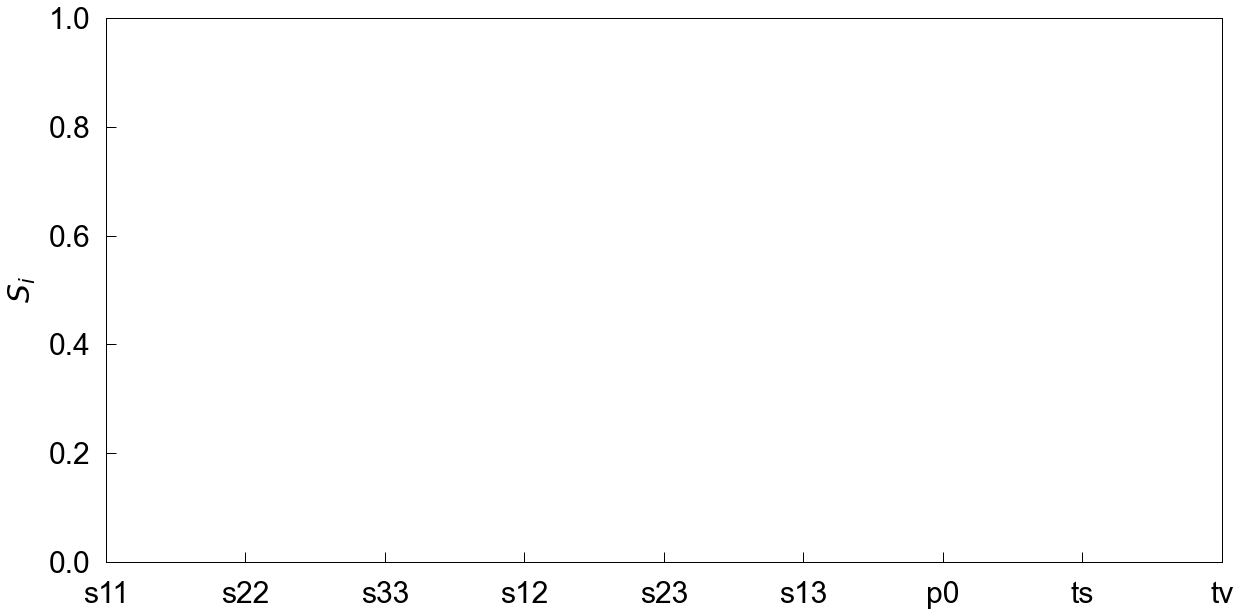

In [39]:
x = np.arange(problem['num_vars'])
plt.xticks(x, problem['names'])
plt.ylabel('$S_{i}$')
plt.bar(x, Si['S1'], yerr = Si['S1_conf'])

<BarContainer object of 10 artists>

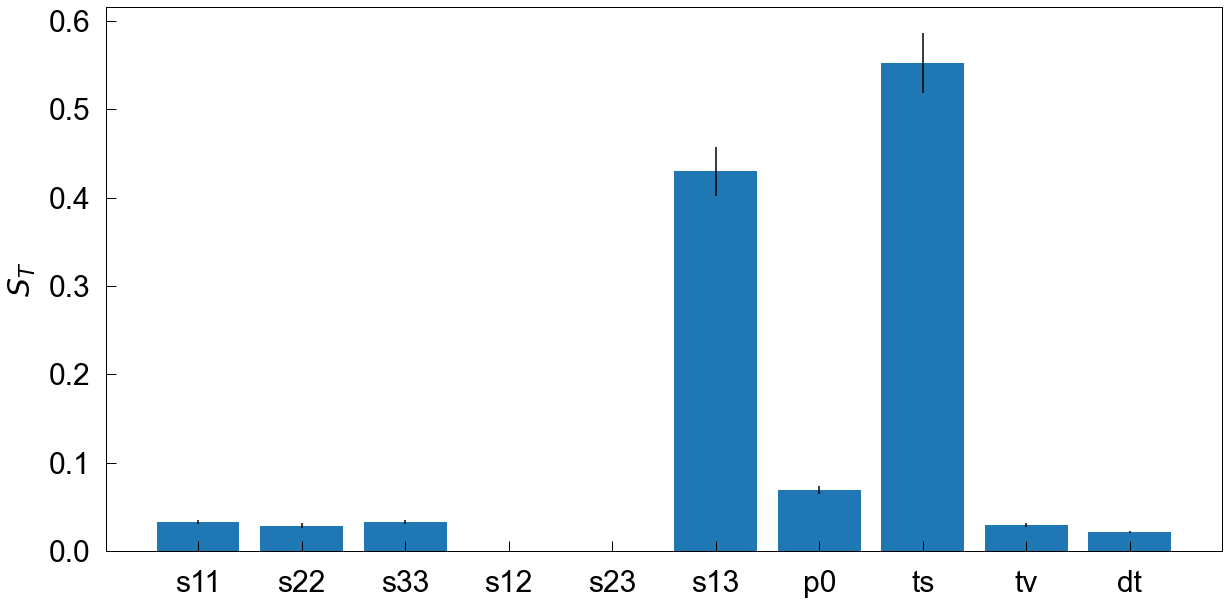

In [10]:
x = np.arange(problem['num_vars'])
plt.xticks(x, problem['names'])
plt.ylabel('$S_{T}$')
plt.bar(x, Si['ST'], yerr = Si['ST_conf'])